# Graphing
__Math 3080: Fundamentals of Data Science__

Reading:
* [McKinney: Chapter 9](https://wesmckinney.com/book/plotting-and-visualization)
* [Irizzary: Chapter 7](https://rafalab.dfci.harvard.edu/dsbook-part-1/dataviz/distributions.html)

-----

## Intro to Exploratory Data Analysis

We all want to do __machine learning__. However, we know that we can't just jump in - we have to prepare data.
* Obtain data
* Clean data
* Analyze data
* Prepare data
* Model
* Evaluate

We have learned how to obtain and clean the data, now we are going to analyze data. We often call this stage __exploratory data analysis__ (EDA).

Why do we do EDA?
* Explore how we can use each variable
  * What variables are related to each other?
  * What variables can be used?
  * Are there any patterns/trends in the data?
* Make a plan for our model

What is involved in EDA?
* Graphing
* Statistics

Let's find out how to make effective graphs in python. Today, we will just make graphs. The next two classes will focus on more intricate graphing (including interactive graphs) and analysis.

-----

## Graphing with Matplotlib

`matplotlib` is the basic package we use for data visualization. There are other packages that are built on matplotlib (like `seaborn`), and other packages which are independent of matplotlib (like some interactive graphs we'll see later). Today, we'll learn the basics of matplotlib.

First, load matplotlib. Let's also create a simple dataset we can work with:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
print(x)
y = x**2 + np.random.randn(len(x))/50
print(y)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[ 9.32756786e-03  1.78249968e-02  2.58693203e-03  8.22516158e-03
 -9.00214283e-03 -3.75450709e-02  2.72799082e-02  2.16747285e-02
  1.52345404e-02 -9.73772115e-03  2.63842621e-02 -3.39584374e-02
  5.31521364e-02  1.63035468e-02 -4.82967515e-04  5.84741919e-03
  4.84061161e-02  4.05288066e-03  6.07679308e-02  4.83618278e-02
  5.38619731e-02  4.42955264e-02  5.81019729e-02  8.49383759e-02
  3.94087861e-02  7.37396644e-02  5.61873278e-02  5.65222353e-02
  6.03142377e-02  6.69009550e-0

Now, we need to create a frame for our figure and a set of axes:

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
plt.show()

From here, we can go ahead and graph our data, or we can set up the environment some more. Here is a quick graph using our data.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,y)
plt.show()

We can add information to the graph. For example, let's add a $y=x^2$ line, a title, axis labels, and a legend. And let's make the $y=x^2$ line dashed.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax.legend(loc='lower right')
plt.show()

Now, let's say that we want an inset, like a zoom-in view, of the range $x=[0.4,0.5]$.

Note that I am also resizing the figure to the size I would like.

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax_inset = fig.add_axes([0.2, 0.6, 0.3, 0.25]) # left, bottom, width, height (range 0 to 1)

ax_inset.plot(x,y)
ax_inset.plot(x,x**2,c='orange')
ax_inset.set_xlim([0.4,0.5])
ax_inset.set_ylim([0.1,0.3])

ticks = ax_inset.set_xticks([0.4,0.42,0.44,0.46,0.48,0.5])
labels = ax_inset.set_xticklabels(['','0.42','0.44','0.46','0.48',''])

ax.legend(loc='lower right')
plt.show()

-----
## Seaborn
Other packages that are built on Matplotlib can simplify the process. We are going to look at the `seaborn` package. Let's load an actual dataset with both numerical and categorical data to see how these work.

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Now, let's make a scatterplot of the total bill compared to the tip left by the customer.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.scatter(tips['total_bill'], tips['tip'])

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

One thing that seaborn can do is highlight each point by a third variable. We can do this in matplotlib, but it's so much easier in seaborn.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.scatter(tips[tips['time'] == 'Lunch']['total_bill'],
           tips[tips['time'] == 'Lunch']['tip'],
           c='orange',
           label='Lunch')
ax.scatter(tips[tips['time'] == 'Dinner']['total_bill'],
           tips[tips['time'] == 'Dinner']['tip'],
           c='blue',
           label='Dinner')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.legend()
plt.show()

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

Other options that can be applied in both matplotlib and seaborn:
* Transparency
* Size

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

We saw how to create one graph in one figure. We can also create multiple graphs.

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(10,15)) # ax is an array of 3 axes

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.7, ax=ax[0,0])
ax[0,0].set_title('Bill vs. Tip by Gender')

sns.countplot(data=tips, x='sex', ax=ax[0,1])
ax[0,1].set_title('Gender of Bill-payers')

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', ax=ax[1,0])
ax[1,0].set_title('Bill vs. Tip by Day')

sns.countplot(data=tips, x='sex', hue='day', ax=ax[1,1])
ax[1,1].set_title('Gender of Bill-payers by day')
    
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax[2,0])
ax[2,0].set_title('Bill vs. Tip by Time of Day')

sns.countplot(data=tips, x='sex', hue='time', ax=ax[2,1])
ax[2,1].set_title('Gender of Bill-payers by Time of Day')

plt.show()

-----

## Colorschemes

We can change the colorschemes on these graphs. Changing the graph colorschemes often helps the graph become more readable. 

Let's start by changing the background. More information can be found on styling Seaborn graphs on the Seaborn website.
* https://seaborn.pydata.org/tutorial/aesthetics.html

In [ ]:
sns.set_theme(style="whitegrid")

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size')

Now, let's look at changing the color of the graphs themselves.

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size', palette=['green','red'])

Seaborn also has some built-in colorschemes. Available colorschemes can be found on the Seaborn website:
* https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day',
                alpha=0.7, size='size', palette='colorblind')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

Some palettes have additional settings. We can save the color palette as a variable and use that.

In [ ]:
palette = sns.color_palette('dark', 4)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day',
                alpha=0.7, size='size', palette=palette)

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

-----

## Statistics

## Types of Graphs

#### Categorical Graphs
* Bar graph
* Pie chart

#### Numerical
* Histogram
* KDE
* Boxplot
* Violinplot
* Scatterplot (Could be Categorical, but...)
* Timeseries
* Regplot
* 2D KDE
* Heatmap

Types of Scales

### Bar graph

In [ ]:
sns.countplot(data=tips, x='day')

In [ ]:
sns.countplot(data=tips, x='day', hue='time')

## Pie chart

In [ ]:
plt.pie(tips['day'].value_counts(), labels=tips['day'].unique())
plt.show()

## Histogram

In [ ]:
sns.histplot(data=tips, x='tip')

In [ ]:
sns.histplot(data=tips, x='tip', bins=7)

In [ ]:
sns.histplot(data=tips, x='tip', binwidth=1)

## KDE Plot

In [ ]:
sns.kdeplot(data=tips, x='tip')

In [ ]:
sns.histplot(data=tips, x='tip', bins=10, kde=True)

In [ ]:
sns.kdeplot(data=tips, x='tip', fill=True, alpha=0.5, hue='day')

## 2D KDE Plot

In [ ]:
sns.kdeplot(data=tips, x='total_bill', y='tip')

In [ ]:
sns.kdeplot(data=tips, x='total_bill', y='tip', hue='time', fill=True, alpha=0.5)

## 5-number summary and boxplot

In [ ]:
tips.describe()

In [ ]:
fig = plt.figure(figsize=(8,3))
sns.boxplot(data=tips, x='tip')

In [ ]:
sns.boxplot(data=tips, y='tip', x='day', hue='smoker')

## Violinplot

In [ ]:
sns.violinplot(data=tips, y='tip', x='day', hue='smoker')

In [ ]:
sns.violinplot(data=tips, y='tip', x='day', hue='smoker', split=True)

## Scatterplot

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker')

## Regplot

In [ ]:
sns.regplot(data=tips, x='total_bill', y='tip')

### Rugplot

In [ ]:
sns.regplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

## Lineplot and Timeseries

Lineplots connect all the data by drawing lines between points. However, care is needed when doing this. A line indicates a progression. If there is no logical progression from one datapoint to the next, 

In [4]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: xlabel='model_year', ylabel='mpg'>

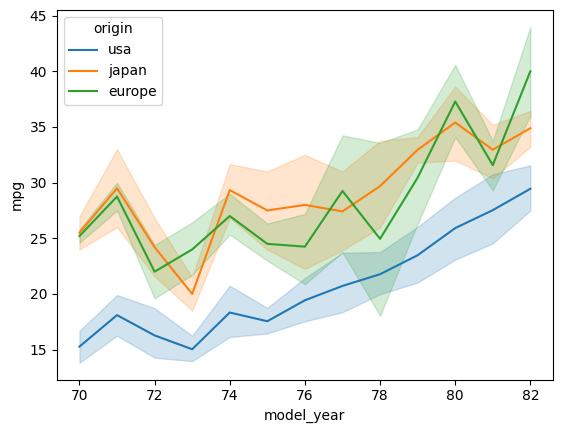

In [16]:
sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin') # Errorbar default to 95% confidence interval
# sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin', ci=None)
# sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin', ci='sd')
# sns.lineplot(data=mpg, x='model_year', y='mpg', hue='origin', ci=90)

## Heatplot

In [ ]:
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm')

## Pairplot

In [ ]:
sns.pairplot(data=tips, hue='time')

### Pair Grid

In [ ]:
g = sns.PairGrid(data=tips, hue='time')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()

## Jointplot

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue='smoker')

### Joint Grid

In [ ]:
g = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='smoker')
g.plot_joint(sns.kdeplot, fill=True, alpha=0.5)
g.plot_marginals(sns.boxplot)

* Timeseries
* Regplot
* Heatmap

-----

## Interactive Graphs

Plotting information onto graphs has always been helpful in passing a lot of information by simple means. After all, a picture is worth a thousand words! The better the picture, the more it says.

But what if we can add another dimension to these graphs? What if we can get users to interact with the graphs? For example, users can look at a graph and compare a number of variables to each other, then look closer at one particular variable and get exact numbers and more details about each variable. 

There are a number of libraries that have included interactions. Plots made with these libraries are called __interactive plots__. These are some of the libraries that include interactive abilities:
* Bokeh
* Plotly
* Altair
* mpld3
* matplotlib + ipywidgets
* Streamlit
* pygal
* bqplot

We will not be going through all of these. Many have done reviews on these libraries (e.g. [Northwester University - Research Computing Services](https://sites.northwestern.edu/researchcomputing/2022/02/03/what-is-the-best-interactive-plotting-package-in-python/)), and they all tend to agree that Bokeh, Plotly, and Altair are the top three libraries. So, we are going to use the Plotly package
* [Plotly Website](https://plotly.com/python/)

In [1]:
import plotly.express as px
import seaborn as sns

tips = sns.load_dataset('tips')

fig = px.scatter(tips, x='total_bill', y='tip')
fig.show()

In [2]:
fig = px.scatter(tips, x='total_bill', y='tip',
                 color='smoker', 
                 size='size',
                 symbol='time',
                 marginal_x='histogram', marginal_y='rug',
                 hover_data=['day','sex'])
fig.show()

In [3]:
fig = px.density_heatmap(tips, x='total_bill', y='tip',
                 marginal_x='box', marginal_y='violin',
                 hover_data=['day','sex'])
fig.show()

### Timeseries (lineplots) on Plotly

In [34]:
from scipy import stats

avg_mpg_by_year = mpg.groupby(['model_year', 'origin'])['mpg'].agg(['mean', 'std']).reset_index()
avg_mpg_by_year.columns = ['model_year', 'origin', 'mpg', 'mpg_std']

fig = px.line(avg_mpg_by_year, x='model_year', y='mpg', color='origin', 
              error_y='mpg_std',
              title='Average MPG by Year by Country of Origin',
              labels={'model_year': 'Year', 'mpg': 'Average MPG', 'origin': 'Country'})
fig.show()

This rest of this section is currently not working (the license to alphavantage has expired). I intend to update this section. In the meantime, this gives an idea of what can be done.

In [21]:
import requests
import pandas as pd

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&outputsize=full&apikey=Q7N3TQXDW2FE59QN'
r = requests.get(url)
data = r.json()

list(data)

['Information']

In [22]:
stock_data = pd.DataFrame(data['Time Series (Daily)'])
stock_data.head()

KeyError: 'Time Series (Daily)'

In [ ]:
px.line(stock_data.loc['4. close'])

In [ ]:
stock_codes = ['F','TSLA','AMZN','DIS']

for code in stock_codes:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&outputsize=full&apikey=Q7N3TQXDW2FE59QN".format(code)
    r = requests.get(url)
    data = r.json()
    stock2 = pd.DataFrame(pd.DataFrame(data['Time Series (Daily)']).loc['4. close'])
    stock2.columns = [code]
    stock = stock.join(stock2, how='left')

stock

### Geographical Maps on Plotly

In [17]:
import numpy as np
import pandas as pd

# Load Data
votes = pd.read_csv('../Datasets/1976-2020-senate.csv', encoding="ISO-8859-1")
votes.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER


In [19]:
# Create a "Percent Votes" column
votes['percentvotes'] = np.round(votes['candidatevotes'] * 100 / votes['totalvotes'], 1)
#print(votes.head())

# Pivot table to get the percent votes by party in the 2020 election
results2020 = pd.pivot_table(votes[votes['year'] == 2020],
                             index='state_po',
                             columns='party_detailed',
                             values='percentvotes')
results2020['OTHER'] = np.round(100 - results2020['REPUBLICAN'] - results2020['DEMOCRAT'],1)

# Add state names to pivot table for labels
states = votes[['state','state_po']].drop_duplicates()
states.set_index('state_po', inplace=True)
states
results2020 = results2020.join(states)

# Replace NaN values with 0
results2020.replace(np.nan, 0, inplace=True)

results2020.head()

,ALASKAN INDEPENDENCE PARTY,APPROVAL VOTING PARTY,CONSTITUTION PARTY,DEMOCRAT,GRASSROOTS,GREEN,INDEPENDENT,INDEPENDENT PARTY OF DELAWARE,INDEPENDENT REPUBLICAN PARTY,LAROUCHE WAS RIGHT,...,NON-AFFILIATED,"OF, BY, FOR!",OTHER,PACIFIC GREEN,REPUBLICAN,UNAFFILIATED,UNITY PARTY,US TAXPAYERS,WILLIE WILSON PARTY,state
state_po,,,,,,,,,,,,,,,,,,,,,
AK,4.7,0.0,0.0,41.20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.9,0.0,53.90,0.0,0.0,0.0,0.0,ALASKA
AL,0.0,0.0,0.0,39.70,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,60.10,0.0,0.0,0.0,0.0,ALABAMA
AR,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,66.50,0.0,0.0,0.0,0.0,ARKANSAS
AZ,0.0,0.0,0.0,10.24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,0.0,9.76,0.0,0.0,0.0,0.0,ARIZONA
CO,0.0,0.3,0.0,53.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.3,0.0,44.20,0.0,0.3,0.0,0.0,COLORADO


In [20]:
fig = px.choropleth(results2020,
                    locationmode='USA-states',
                    scope='usa',
                    locations=results2020.index,
                    color='REPUBLICAN',
                    color_continuous_scale='RdBu_r',
                    range_color = [0,100],
                    hover_name='state',
                    hover_data = ['REPUBLICAN','DEMOCRAT','OTHER']
                    )
fig.show()

### Image Progression

(https://plotly.com/python/imshow/)

-----
## Student's Play time
Can we predict a wizard's/witch's Hogwarts House based on hair color? eye color? ancestry?
* https://github.com/drolsonmi/math3080/tree/main/Datasets and select [HarryPotterCharacters.csv](https://raw.githubusercontent.com/drolsonmi/math3080/main/Datasets/HarryPotterCharacters.csv)
* https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset?select=shortversioncharacters.csv

Data to use:
* Tips dataset
* Iris dataset
* Energy Production Data ([EIA ]())

Plots to show:
* A couple basic/statistical charts
* Financial charts
* Maps
* 3-dimensional charts